## BankNifty Alpha BackTest 2018


In [1]:
import pandas as pd
from matplotlib.pyplot import plot
from statistics import *
import sys
sys.path.insert(1,"../")
from AlphaTests import *

In [2]:
options = ["banknifty-options-PE-1.csv",
          "banknifty-options-PE-2.csv",
          "banknifty-options-PE-3.csv",
          "banknifty-options-PE-4.csv",
          "banknifty-options-PE-5.csv",
          "banknifty-options-PE-6.csv",]

prices = ["banknifty-prices-1.csv",
          "banknifty-prices-2.csv",
          "banknifty-prices-3.csv",
          "banknifty-prices-4.csv",
          "banknifty-prices-5.csv",
          "banknifty-prices-6.csv",]

In [4]:
loader = Loader(options,prices)

In [4]:
loader.find_individual_optimal_threshold()

Mean Threshold : 1.085000


[2.0000000000000013,
 0.5100000000000001,
 1.4100000000000008,
 1.4300000000000008,
 0.36000000000000004,
 0.8000000000000004]

In [5]:
loader.maximize_returns()

[1.2700000000000007,
 507.54954001949517,
 -10,
 462.3974099173663,
 969.9469499368614]

In [13]:
loader.minimize_losses()

[0.31, 28.55728429985856, -10, 70, 98.55728429985857]

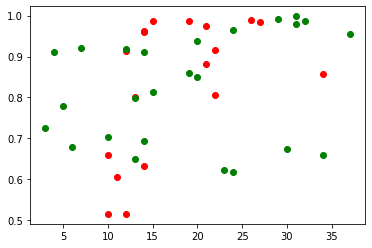

In [6]:
test_thresh = 0.5
loader.plot_scatter(test_thresh,limit=test_thresh*2)

In [6]:
loader.find_net_returns(0.5)

-26.61866467525997

In [23]:
options_df = []
for i in options:
    options_df.append(pd.read_csv(i))

In [24]:
df = pd.concat(options_df)
df["Alpha"] = (df["Close"] - df["Strike Price"]) / df["Close"]
# options["Alpha-Prev"] = options.Alpha.shift(1)
df["Alpha-Change"] = ((df["Alpha"] - df.Alpha.shift(1)) / df["Alpha"])*100
df["Alpha-Mean"] = (df.Alpha.shift(1)+df.Alpha.shift(2)+df.Alpha.shift(3)) / 3
df["Change"] = ((df["Close"] - df["Open"]) / df["Open"])*100

In [25]:
df.to_csv("main-options-ce.csv")